In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import cv2
import numpy as np
import types

# LSB Based Image Steganography

In [4]:
def messageToBinary(message):
  if (isinstance(message, str)):
    return ''.join([format(ord(i),'08b') for i in message])
  elif (isinstance(message, bytes) or isinstance(message, np.ndarray)):
    return [format(i,'08b') for i in message]
  elif (isinstance(message, int) or isinstance(message, np.uint8)):
    return format(message,'08b')
  else:
    raise TypeError('Input Type Not Supported')

In [5]:
def hideData(image,secret_message):
  #calculate the maximum bytes to encode
  n_bytes = image.shape[0] * image.shape[1] * 3 // 8
  print('Maximum bytes to encode:',n_bytes)
  #check if the number of bytes to encode is less than the maximum bytes in the image
  if (len(secret_message) > n_bytes):
    raise ValueError('Error encountered insufficient bytes, need bigger image or less data!!')
  secret_message += '#####' #you can use any string as a delimeter
  data_index = 0
  #convert input data to binary format using messageToBinary()
  binary_secret_msg = messageToBinary(secret_message)
  data_len = len(binary_secret_msg) #Find the length of data that needs to be hidden
  print(data_len)
  for values in image:
    for pixel in values:
      #convert rgb values to binary format
      r, g, b  = messageToBinary(pixel)
      #modify the lsb only if there is 
      if (data_index < data_len):
        #hide the data into lsb of red pixel
        pixel[0] = int (r[:-1] + binary_secret_msg[data_index], 2)
        data_index += 1
      if (data_index < data_len):
        #hide the data into lsb of green pixel
        pixel[1] = int (g[:-1] + binary_secret_msg[data_index], 2)
        data_index += 1
      if (data_index < data_len):
        #hide the data into lsb of blue pixel
        pixel[2] = int (b[:-1] + binary_secret_msg[data_index], 2)
        data_index += 1
      #if data is encoded just break out of the loop
      if (data_index >= data_len):
        break
  print(data_index)
  return image

In [6]:
def showData(image):
  binary_data = ''
  for values in image:
    for pixel in values:
      r, g, b = messageToBinary(pixel) #convert the red, green and blue values intpo binary format
      binary_data += r[-1] #extracting data from the lsb of red pixel
      binary_data += g[-1] #extraxting data from the lsb of green pixel
      binary_data += b[-1] #extracting data from the lsb of blue pixel
  print(binary_data)
  #split by 8 bits
  all_bytes = [ binary_data[i: i+8] for i in range(0,len(binary_data),8)]
  #convert from bits into characters
  decoded_data = ''
  for byte in all_bytes:
    decoded_data += chr( int (byte,2))
    if (decoded_data[-5:] == '#####'): #check if we have reached the delimeter which is '#####'
      break
  print(decoded_data)
  return decoded_data[:-5]

# Encryption Data

In [7]:
image_name = 'Test Images/RGB Images/PNG Images/Apple1.png'
image = cv2.imread(image_name) # Read the input image using OpenCV-Python.

In [8]:
print("The shape of the image is: ",image.shape) #check the shape of image to calculate the number of bytes in it
print("The original image is as shown below: ")
resized_image = cv2.resize(image, (100, 100)) #resize the image as per your requirement

The shape of the image is:  (1204, 1880, 3)
The original image is as shown below: 


In [12]:
data = input("Enter data to be encoded : ")

Enter data to be encoded : Happy Valentines Day


In [13]:
encoded_image = hideData(image, data)

Maximum bytes to encode: 848820
200
200


In [16]:
filename = 'lsb_encode.png'
cv2.imwrite('lsb/'+filename, encoded_image)

True

# Decryption Data

In [17]:
image = cv2.imread('lsb/lsb_encode.png')#read the image using cv2.imread()

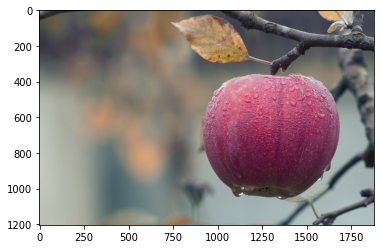

In [23]:
import matplotlib.pyplot as plt 
import matplotlib.image as img 
  
# reading the image 
testImage = img.imread('lsb/lsb_encode.png') 
  
# displaying the image 
plt.imshow(testImage)

In [18]:
resized_image = cv2.resize(image, (100, 100))

In [19]:
text = showData(image)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [20]:
text

'Happy Valentines Day'

# KMeans+LSB+AES

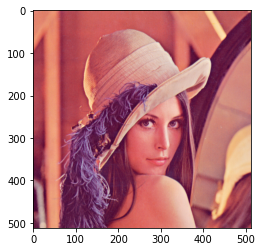

In [24]:
#loading the image
image = cv2.imread('Test Images/RGB Images/PNG Images/Lenna1.png')
#changing the color of the image from bgr to rgb
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#reshaping the image into a 2D array of pixels and 3 color values(RGB)
pixel_vals = image.reshape((-1,3))
#converts to float type only for supporting cv2.kmeans
pixel_vals = np.float32(pixel_vals) 

plt.imshow(image)

Clustering Process

In [25]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
#choosing the number of clusters
k=3
#performing kmeans clustering
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

convert data into 8 bit values

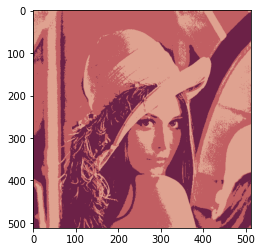

In [26]:
centers = np.uint8(centers)
#mapping labels to center points (RGB Value)
segmented_data = centers[labels.flatten()]
#reshape the data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))
plt.imshow(segmented_image)

In [27]:
from PIL import Image
clustered_image = Image.fromarray(segmented_image)
clustered_image.save('lsb_aes/clustered_img.png')

In [28]:
print(retval)

338657742.50945234


In [29]:
print(labels)

[[1]
 [1]
 [1]
 ...
 [0]
 [0]
 [0]]


In [30]:
centers

array([[193,  94,  98],
       [223, 162, 144],
       [108,  33,  71]], dtype=uint8)

In [31]:
pixel_vals

array([[226., 137., 125.],
       [226., 137., 125.],
       [223., 137., 133.],
       ...,
       [179.,  70.,  79.],
       [181.,  71.,  81.],
       [185.,  74.,  81.]], dtype=float32)

In [32]:
image_one_array = []
image_two_array = []
image_three_array = []
for i in range(0, len(labels)):
  if (labels[i][0] == 0):
    image_one_array.append(pixel_vals[i])
  elif (labels[i][0] == 1):
    image_two_array.append(pixel_vals[i])
  else:
    image_three_array.append(pixel_vals[i])
print(len(image_one_array),len(image_two_array),len(image_three_array))

115030 78822 68292


In [33]:
import math
len1 = len(image_one_array)
len2 = len(image_two_array)
len3 = len(image_three_array)
#padding of the image
pad1 = math.ceil(math.sqrt(len1))**2-len1
pad2 = math.ceil(math.sqrt(len2))**2-len2
pad3 = math.ceil(math.sqrt(len3))**2-len3
print(pad1, pad2, pad3)

570 139 352


In [34]:
white = np.array([255.0,255.0,255.0],dtype = np.float32)
for i in range(0,pad1):
    image_one_array.append(white)
for i in range(0,pad2):
    image_two_array.append(white)
for i in range(0,pad3):
    image_three_array.append(white)

In [35]:
d1 = int(math.sqrt(len(image_one_array)))
print(len(image_one_array), d1)
d2 = int(math.sqrt(len(image_two_array)))
print(len(image_two_array), d2)
d3 = int(math.sqrt(len(image_three_array)))
print(len(image_three_array), d3)

115600 340
78961 281
68644 262


In [36]:
#creation of three images according to the clusters
cluster1 = np.uint8(np.array(image_one_array)).reshape((d1, d1, 3))
cluster2 = np.uint8(np.array(image_two_array)).reshape((d2, d2, 3))
cluster3 = np.uint8(np.array(image_three_array)).reshape(d3, d3, 3)

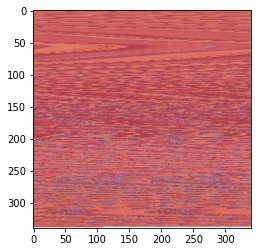

In [37]:
plt.imshow(cluster1)
cluster1_img = Image.fromarray(cluster1)
cluster1_img.save('lsb_aes/cluster1_img.png')

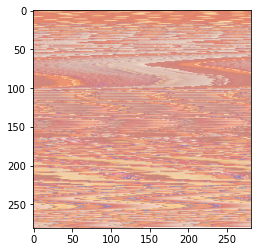

In [38]:
plt.imshow(cluster2)
cluster2_img = Image.fromarray(cluster2)
cluster2_img.save('lsb_aes/cluster2_img.png')

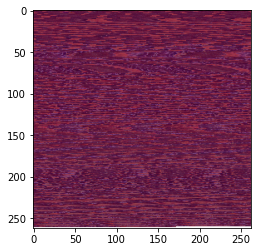

In [39]:
plt.imshow(cluster3)
cluster3_img = Image.fromarray(cluster3)
cluster3_img.save('lsb_aes/cluster3_img.png')

In [50]:
def messageToBinary(message):
    if ( type (message) == str):
        return ''.join([ format(ord(i), "08b") for i in message ])
    elif ( type (message) == bytes): #or type(message) == np.ndarray:
        return ''.join([ format(i, "08b") for i in message ])
    elif ( type (message) == np.ndarray):
        return [format(i, "08b") for i in message]
    elif ( type (message) == int or type (message) == np.uint8):
        return format(message, "08b")
    else:
        raise TypeError("Input type not supported")

In [49]:
#to hide secret msg into image
def hideData(image,secret_message):
  #calculate the maximum bytes to encode
  n_bytes = image.shape[0] * image.shape[1] * 3 // 8
  #print('Maximum bytes to encode:',n_bytes)
  #check if the number of bytes to encode is less than the maximum bytes in the image
  if (len(secret_message) > n_bytes):
    raise ValueError('Error encountered insufficient bytes, need bigger image or less data!!')
  secret_message += b'#####' #you can use any string as a delimeter
  data_index = 0
  #convert input data to binary format using messageToBinary()
  binary_secret_msg = messageToBinary(secret_message)
  print('binary',binary_secret_msg)
  data_len = len(binary_secret_msg) #Find the length of data that needs to be hidden
  #print(data_len)
  for values in image:
    for pixel in values:
      #convert rgb values to binary format
      r, g, b  = messageToBinary(pixel)
      #modify the lsb only if there is 
      if (data_index < data_len):
        #hide the data into lsb of red pixel
        pixel[0] = int (r[:-1] + binary_secret_msg[data_index], 2)
        data_index += 1
      if (data_index < data_len):
        #hide the data into lsb of green pixel
        pixel[1] = int (g[:-1] + binary_secret_msg[data_index], 2)
        data_index += 1
      if (data_index < data_len):
        #hide the data into lsb of blue pixel
        pixel[2] = int (b[:-1] + binary_secret_msg[data_index], 2)
        data_index += 1
      #if data is encoded just break out of the loop
      if (data_index >= data_len):
        break
  #print(data_index)
  return image

In [51]:
def showData(image):
  binary_data = ''
  for values in image:
    for pixel in values:
      r, g, b = messageToBinary(pixel) #convert the red, green and blue values intpo binary format
      binary_data += r[-1] #extracting data from the lsb of red pixel
      binary_data += g[-1] #extraxting data from the lsb of green pixel
      binary_data += b[-1] #extracting data from the lsb of blue pixel
  #print(binary_data)
  #split by 8 bits
  all_bytes = [ binary_data[i: i+8] for i in range(0,len(binary_data),8)]
  print('all bytes')
  #convert from bits into characters
  decoded_data = b''
  for byte in all_bytes:
    try:
      decoded_data += int (byte,2).to_bytes (len(byte) // 8, byteorder='big')
      if (decoded_data[-5:] == b'#####'): #check if we have reached the delimeter which is '#####'
        break
    except Exception as e:
        print(byte)
        break
  print(decoded_data)
  return decoded_data[:-5] #remove the delimeter to show the original hidden message

LSB and AES Algorithm

In [41]:
from Crypto.Cipher import AES

In [45]:
#text hiding in image
key = b'Sixteen byte key'
msg = input('Enter the message: ')

Enter the message: THIS DAY IS BAD DAY


In [46]:
print('Message:',msg,len(msg))
#encoding of messages
msg = msg.encode()
#applying of AES-128 algorithm for encryption
cipher = AES.new( key, AES.MODE_ECB)
enc_msg = cipher.encrypt(msg*16)
#printing of encrypted message
print('Encrypted message:',enc_msg)

Message: THIS DAY IS BAD DAY 19
Encrypted message: b'\xa3\xf2\xdd\xe6\x88J\xd7lYu\xe2h09z\xc3\x0f\xbd.\xd7\x13\xa0\xae+\xe5p\xfe\x9b\xa2C\xbd+;\xd2\xff\x93/\x96\xfcdj\xff\xf0}n\x15\xca#\xc7J\xc4\xeb\xebU\xe1\x0b\xdb;_\xab\xaa\xb4s\xe3\xc2\xd7\xddE\xb4nZ\x85\x15\x969t\xb6\xb8\xbb\xf1\xcd\xa7\x8c\xe4\xc6\xe5\xe7\xcdM\x1eX\x10.q\xb8\xd5+\x19\xd2\xd0\x8by\x84*\xa8\x10\x11\x98\xe4\x95\x9a\xb8\xe1\xab^\x03\x92\xbaBE\xb3w\xc8\x13\t`\xc5M\x1d\xc6M\xf8/\x9f[\xe9\xaa!\x06\xbb\x8d??\x8el\x15\x95\xec\xf5\xca\xd8P\xaa\x0e\xdeD\xe6n\x81\xd9<\xa5\xbe\x8f\xcf~\x0c\xed\xab\x98k`\xc9\xb5\x94\xa1\xae\xc3\xab\xffv\x0f\x12b\xbb\x90\x97U\xe8$\xf7D\xdb;.?\xb5\xa2?\xc8\x0c\xfb\x90;\xec\x98\xde\xab\xdc.\x0b\x8ag"8\xff\xc9\x0b\x97\x82b\'&\xb1\xa0\xb8\xc05Yvk\xf5\xe1hR\xc9\xb2X\n\xaf\xba>z\xa5G\x8aJ\xaav\xbe\xffR\xd1\xf4i\rzdlm\x05\xde\xc4\x96D\x9d\x17\xa1\x88U\x8e\x80pX\xb0\xfd\x1af\x84^\n\xb4\xd5\xc1#\xe3\x08\x9e\xe2\xc0c\x99\xd2:6\xdd\xd5\x94i(\xf0\n2\xdc'


In [47]:
div_len = int(math.ceil(len(enc_msg)/3))
chunk1 = enc_msg[0:div_len]
chunk2 = enc_msg[div_len: 2*div_len]
chunk3 = enc_msg[2*div_len:]
print("chunk1:", chunk1)
print("chunk2:", chunk2)
print("chunk3:", chunk3)

chunk1: b'\xa3\xf2\xdd\xe6\x88J\xd7lYu\xe2h09z\xc3\x0f\xbd.\xd7\x13\xa0\xae+\xe5p\xfe\x9b\xa2C\xbd+;\xd2\xff\x93/\x96\xfcdj\xff\xf0}n\x15\xca#\xc7J\xc4\xeb\xebU\xe1\x0b\xdb;_\xab\xaa\xb4s\xe3\xc2\xd7\xddE\xb4nZ\x85\x15\x969t\xb6\xb8\xbb\xf1\xcd\xa7\x8c\xe4\xc6\xe5\xe7\xcdM\x1eX\x10.q\xb8\xd5+\x19\xd2\xd0\x8by'
chunk2: b'\x84*\xa8\x10\x11\x98\xe4\x95\x9a\xb8\xe1\xab^\x03\x92\xbaBE\xb3w\xc8\x13\t`\xc5M\x1d\xc6M\xf8/\x9f[\xe9\xaa!\x06\xbb\x8d??\x8el\x15\x95\xec\xf5\xca\xd8P\xaa\x0e\xdeD\xe6n\x81\xd9<\xa5\xbe\x8f\xcf~\x0c\xed\xab\x98k`\xc9\xb5\x94\xa1\xae\xc3\xab\xffv\x0f\x12b\xbb\x90\x97U\xe8$\xf7D\xdb;.?\xb5\xa2?\xc8\x0c\xfb\x90;'
chunk3: b'\xec\x98\xde\xab\xdc.\x0b\x8ag"8\xff\xc9\x0b\x97\x82b\'&\xb1\xa0\xb8\xc05Yvk\xf5\xe1hR\xc9\xb2X\n\xaf\xba>z\xa5G\x8aJ\xaav\xbe\xffR\xd1\xf4i\rzdlm\x05\xde\xc4\x96D\x9d\x17\xa1\x88U\x8e\x80pX\xb0\xfd\x1af\x84^\n\xb4\xd5\xc1#\xe3\x08\x9e\xe2\xc0c\x99\xd2:6\xdd\xd5\x94i(\xf0\n2\xdc'


# Encryption

In [52]:
image1 = cv2.imread('lsb_aes/cluster1_img.png')
image_encoded1 = hideData(image1, chunk1)
cv2.imwrite('lsb_aes/cluster1_img_encoded.png', image_encoded1)

binary 1010001111110010110111011110011010001000010010101101011101101100010110010111010111100010011010000011000000111001011110101100001100001111101111010010111011010111000100111010000010101110001010111110010101110000111111101001101110100010010000111011110100101011001110111101001011111111100100110010111110010110111111000110010001101010111111111111000001111101011011100001010111001010001000111100011101001010110001001110101111101011010101011110000100001011110110110011101101011111101010111010101010110100011100111110001111000010110101111101110101000101101101000110111001011010100001010001010110010110001110010111010010110110101110001011101111110001110011011010011110001100111001001100011011100101111001111100110101001101000111100101100000010000001011100111000110111000110101010010101100011001110100101101000010001011011110010010001100100011001000110010001100100011


True

In [53]:
image2 = cv2.imread('lsb_aes/cluster2_img.png')
image_encoded2 = hideData(image2, chunk2)
cv2.imwrite('lsb_aes/cluster2_img_encoded.png', image_encoded2)

binary 1000010000101010101010000001000000010001100110001110010010010101100110101011100011100001101010110101111000000011100100101011101001000010010001011011001101110111110010000001001100001001011000001100010101001101000111011100011001001101111110000010111110011111010110111110100110101010001000010000011010111011100011010011111100111111100011100110110000010101100101011110110011110101110010101101100001010000101010100000111011011110010001001110011001101110100000011101100100111100101001011011111010001111110011110111111000001100111011011010101110011000011010110110000011001001101101011001010010100001101011101100001110101011111111110111011000001111000100100110001010111011100100001001011101010101111010000010010011110111010001001101101100111011001011100011111110110101101000100011111111001000000011001111101110010000001110110010001100100011001000110010001100100011


True

In [54]:
image3 = cv2.imread('lsb_aes/cluster3_img.png')
image_encoded3 = hideData(image3, chunk3)
cv2.imwrite('lsb_aes/cluster3_img_encoded.png', image_encoded3)

binary 111011001001100011011110101010111101110000101110000010111000101001100111001000100011100011111111110010010000101110010111100000100110001000100111001001101011000110100000101110001100000000110101010110010111011001101011111101011110000101101000010100101100100110110010010110000000101010101111101110100011111001111010101001010100011110001010010010101010101001110110101111101111111101010010110100011111010001101001000011010111101001100100011011000110110100000101110111101100010010010110010001001001110100010111101000011000100001010101100011101000000001110000010110001011000011111101000110100110011010000100010111100000101010110100110101011100000100100011111000110000100010011110111000101100000001100011100110011101001000111010001101101101110111010101100101000110100100101000111100000000101000110010110111000010001100100011001000110010001100100011


True

# Decryption

In [56]:
image_dec1 = cv2.imread('lsb_aes/cluster1_img_encoded.png')
decoded_chunk1 = showData(image_dec1)
print("decoded chunk1:",decoded_chunk1)

image_dec2 = cv2.imread('lsb_aes/cluster2_img_encoded.png')
decoded_chunk2 = showData(image_dec2)
print("decoded chunk2:",decoded_chunk2)

image_dec3 = cv2.imread('lsb_aes/cluster3_img_encoded.png')
decoded_chunk3 = showData(image_dec3)
print("decoded chunk3:",decoded_chunk3)

all bytes
b'\xa3\xf2\xdd\xe6\x88J\xd7lYu\xe2h09z\xc3\x0f\xbd.\xd7\x13\xa0\xae+\xe5p\xfe\x9b\xa2C\xbd+;\xd2\xff\x93/\x96\xfcdj\xff\xf0}n\x15\xca#\xc7J\xc4\xeb\xebU\xe1\x0b\xdb;_\xab\xaa\xb4s\xe3\xc2\xd7\xddE\xb4nZ\x85\x15\x969t\xb6\xb8\xbb\xf1\xcd\xa7\x8c\xe4\xc6\xe5\xe7\xcdM\x1eX\x10.q\xb8\xd5+\x19\xd2\xd0\x8by#####'
decoded chunk1: b'\xa3\xf2\xdd\xe6\x88J\xd7lYu\xe2h09z\xc3\x0f\xbd.\xd7\x13\xa0\xae+\xe5p\xfe\x9b\xa2C\xbd+;\xd2\xff\x93/\x96\xfcdj\xff\xf0}n\x15\xca#\xc7J\xc4\xeb\xebU\xe1\x0b\xdb;_\xab\xaa\xb4s\xe3\xc2\xd7\xddE\xb4nZ\x85\x15\x969t\xb6\xb8\xbb\xf1\xcd\xa7\x8c\xe4\xc6\xe5\xe7\xcdM\x1eX\x10.q\xb8\xd5+\x19\xd2\xd0\x8by'
all bytes
b'\x84*\xa8\x10\x11\x98\xe4\x95\x9a\xb8\xe1\xab^\x03\x92\xbaBE\xb3w\xc8\x13\t`\xc5M\x1d\xc6M\xf8/\x9f[\xe9\xaa!\x06\xbb\x8d??\x8el\x15\x95\xec\xf5\xca\xd8P\xaa\x0e\xdeD\xe6n\x81\xd9<\xa5\xbe\x8f\xcf~\x0c\xed\xab\x98k`\xc9\xb5\x94\xa1\xae\xc3\xab\xffv\x0f\x12b\xbb\x90\x97U\xe8$\xf7D\xdb;.?\xb5\xa2?\xc8\x0c\xfb\x90;#####'
decoded chunk2: b'\x84*\xa8\x

In [57]:
#concatenating the shown message
decoded_encrypted_msg = decoded_chunk1 + decoded_chunk2 + decoded_chunk3
print("decoded encrypted message:", decoded_encrypted_msg)

decoded encrypted message: b'\xa3\xf2\xdd\xe6\x88J\xd7lYu\xe2h09z\xc3\x0f\xbd.\xd7\x13\xa0\xae+\xe5p\xfe\x9b\xa2C\xbd+;\xd2\xff\x93/\x96\xfcdj\xff\xf0}n\x15\xca#\xc7J\xc4\xeb\xebU\xe1\x0b\xdb;_\xab\xaa\xb4s\xe3\xc2\xd7\xddE\xb4nZ\x85\x15\x969t\xb6\xb8\xbb\xf1\xcd\xa7\x8c\xe4\xc6\xe5\xe7\xcdM\x1eX\x10.q\xb8\xd5+\x19\xd2\xd0\x8by\x84*\xa8\x10\x11\x98\xe4\x95\x9a\xb8\xe1\xab^\x03\x92\xbaBE\xb3w\xc8\x13\t`\xc5M\x1d\xc6M\xf8/\x9f[\xe9\xaa!\x06\xbb\x8d??\x8el\x15\x95\xec\xf5\xca\xd8P\xaa\x0e\xdeD\xe6n\x81\xd9<\xa5\xbe\x8f\xcf~\x0c\xed\xab\x98k`\xc9\xb5\x94\xa1\xae\xc3\xab\xffv\x0f\x12b\xbb\x90\x97U\xe8$\xf7D\xdb;.?\xb5\xa2?\xc8\x0c\xfb\x90;\xec\x98\xde\xab\xdc.\x0b\x8ag"8\xff\xc9\x0b\x97\x82b\'&\xb1\xa0\xb8\xc05Yvk\xf5\xe1hR\xc9\xb2X\n\xaf\xba>z\xa5G\x8aJ\xaav\xbe\xffR\xd1\xf4i\rzdlm\x05\xde\xc4\x96D\x9d\x17\xa1\x88U\x8e\x80pX\xb0\xfd\x1af\x84^\n\xb4\xd5\xc1#\xe3\x08\x9e\xe2\xc0c\x99\xd2:6\xdd\xd5\x94i(\xf0\n2\xdc'


In [58]:
dec_msg = cipher.decrypt(decoded_encrypted_msg)
print("Decrypted Message:", dec_msg)

Decrypted Message: b'THIS DAY IS BAD DAYTHIS DAY IS BAD DAYTHIS DAY IS BAD DAYTHIS DAY IS BAD DAYTHIS DAY IS BAD DAYTHIS DAY IS BAD DAYTHIS DAY IS BAD DAYTHIS DAY IS BAD DAYTHIS DAY IS BAD DAYTHIS DAY IS BAD DAYTHIS DAY IS BAD DAYTHIS DAY IS BAD DAYTHIS DAY IS BAD DAYTHIS DAY IS BAD DAYTHIS DAY IS BAD DAYTHIS DAY IS BAD DAY'


In [60]:
msg1 = dec_msg.decode()
print(msg1[0:len(msg)])

THIS DAY IS BAD DAY


# DCT + AES

In [71]:
from PIL import Image
import numpy as np
import itertools
import types

In [61]:
quant = np.array([[16,11,10,16,24,40,51,61],
                    [12,12,14,19,26,58,60,55],
                    [14,13,16,24,40,57,69,56],
                    [14,17,22,29,51,87,80,62],
                    [18,22,37,56,68,109,103,77],
                    [24,35,55,64,81,104,113,92],
                    [49,64,78,87,103,121,120,101],
                    [72,92,95,98,112,100,103,99]])

In [62]:
class DiscreteCosineTransform:
    #created the constructor
    def __init__(self):
        self.message = None
        self.bitMessage = None
        self.oriCol = 0
        self.oriRow = 0
        self.numBits = 0

    def chunks(self,l,n):
        m = int(n)
        for i in range(0,len(l),m):
            yield l[i:i+m]
    #function to add padding to make the function dividable by 8x8 blocks
    def addPadd(self,img,row,col):
        img = cv2.resize(img,(col+(8-col%8),row+(8-row%8)))
        return img
    #function to transform the message that is wanted to be hidden from plaintext to a list of bits
    def toBits(self):
        bits = []
        for char in self.message:
            binval = bin(char)[2:].rjust(8,'0')
            #print('bin '+binval)
            bits.append(binval)
        self.numBits = bin(len(bits))[2:].rjust(8,'0')
        return bits
    #applying dct for encoding 
    def DCTEncoder(self,img,secret):
        self.message = str(len(secret)).encode()+b'*'+secret
        self.bitMessage = self.toBits()
        #get the size of the image in pixels
        row, col = img.shape[:2]
        self.oriRow = row
        self.oriCol = col
        if((col/8)*(row/8)<len(secret)):
            print("Error: Message too large to encode in image")
            return False
        if(row%8!=0 or col%8!=0):
            img = self.addPadd(img,row,col)
        row,col = img.shape[:2]
        #split image into RGB channels
        bImg,gImg,rImg = cv2.split(img)
        #message to be hid in blue channel so converted to type float32 for dct function
        #print(bImg.shape)
        bImg = np.float32(bImg)
        #breaking the image into 8x8 blocks
        imgBlocks = [np.round(bImg[j:j+8,i:i+8]-128) for (j,i) in itertools.product(range(0,row,8),range(0,col,8))]
        #print(imgBlocks[0])
        #blocks are run through dct / apply dct to it
        dctBlocks = [np.round(cv2.dct(ib)) for ib in imgBlocks]

        quantDCT = [np.round(dbk/quant) for dbk in dctBlocks]
        
        messIndex=0
        letterIndex=0
        print(self.bitMessage)
        for qb in quantDCT:
            #find LSB in DCT cofficient and replace it with message bit
            #print(len(qb))
            DC = qb[0][0]
            #print(DC.shape)
            DC = np.uint8(DC)
            #print(DC)
            DC = np.unpackbits(DC)
            
            DC[7] = self.bitMessage[messIndex][letterIndex]
            DC = np.packbits(DC)
            DC = np.float32(DC)
            DC = DC - 255
            qb[0][0] = DC
            letterIndex = letterIndex + 1
            if (letterIndex == 8):
                letterIndex = 0
                messIndex = messIndex + 1
                if (messIndex == len(self.message)):
                    break
        #writing the stereo image
        #blocks run inversely through quantization table
        sImgBlocks = [quantizedBlock *quant+128 for quantizedBlock in quantDCT]
        #blocks run through inverse DCT
        #sImgBlocks = [cv2.idct(B)+128 for B in quantizedDCT]
        #puts the new image back together
        sImg=[]
        for chunkRowBlocks in self.chunks(sImgBlocks, col/8):
            for rowBlockNum in range(8):
                for block in chunkRowBlocks:
                    sImg.extend(block[rowBlockNum])
        print(len(sImg))
        sImg = np.array(sImg).reshape(row, col)
        #converted from type float32
        sImg = np.uint8(sImg)
        #show(sImg)
        sImg = cv2.merge((sImg,gImg,rImg))
        return sImg
    #decoding
    #apply dct for decoding 
    def DCTDecoder(self,img):
        row, col = img.shape[:2]
        messSize = None
        messageBits = []
        buff = 0
        #split the image into RGB channels
        bImg,gImg,rImg = cv2.split(img)
        #message hid in blue channel so converted to type float32 for dct fuction
        bImg = np.float32(bImg)
        #break into 8x8 blocks
        imgBlocks = [bImg[j:j+8,i:i+8]-128 for (j,i) in itertools.product(range(0,row,8),range(0,col,8))]
        #dctBlocks = [np.round(cv2.dct(ib)) for ib in imgBlocks]
        # the blocks are run through quantization table
        quantDCT = [ib/quant for ib in imgBlocks]
        i=0
        flag = 0
        nb = ''
        #message is extracted from LSB of DCT coefficients
        for qb in quantDCT:
            DC = qb[0][0]
            DC = np.uint8(DC)
            #unpacking of bits of DCT
            DC = np.unpackbits(DC)
            if (flag == 0):
                if (DC[7] == 1):
                    buff+=(0 & 1) << (7-i)
                elif (DC[7] == 0):
                    buff+=(1&1) << (7-i)
            else:
                if (DC[7] == 1):
                    nb+='0'
                elif (DC[7] == 0):
                    nb+='1'
            i=1+i
            #print(i)
            if (i == 8):
                #print(buff,end=' ')
                if (flag == 0):
                    messageBits.append(buff)
                    #print(buff,end=' ')
                    buff = 0
                else:
                    messageBits.append(nb)
                    #print(nb,end=' ')
                    nb = ''
                i =0
                if (messageBits[-1] == 42 and messSize is None):
                    try:
                        flag = 1
                        messSize = int(str(chr(messageBits[0]))+str(chr(messageBits[1])))#int(''.join(messageBits[:-1]))
                        print(type(messSize),'a')
                    except:
                        print('b')
                        pass
            if (len(messageBits) - len(str(messSize)) - 1 == messSize):
                #print(''.join(messageBits)[len(str(messSize))+1:])
                return messageBits
                pass
        
        sImgBlocks = [qb * quant+128 for qb in quantDCT]
        #blocks run through inverse DCT
        sImg=[]
        for chunkRowBlocks in self.chunks(sImgBlocks, col/8):
            for rowBlockNum in range(8):
                for block in chunkRowBlocks:
                    sImg.extend(block[rowBlockNum])
        sImg = np.array(sImg).reshape(row, col)
        #converted from type float32
        sImg = np.uint8(sImg)
        sImg = cv2.merge((sImg,gImg,rImg))
        
        return ''

In [63]:
def msg_encrypt(msg,cipher):
    if (len(msg)%16 != 0):
        #a = len(msg)%16 != 0 
        #print(a)
        msg = msg + ' '*(16 - len(msg)%16)
    #nonce = cipher.nonce
    t1 = msg.encode()
    enc_msg = cipher.encrypt(t1)
    return enc_msg

In [64]:
def msg_decrypt(ctext,cipher):
    dec_msg = cipher.decrypt(ctext)
    msg1 = dec_msg.decode()
    return msg1

In [65]:
image = cv2.imread('Test Images/RGB Images/PNG Images/parrot1.png',cv2.IMREAD_UNCHANGED)

In [67]:
key = b'Sixteen byte key'
secret_msg = input('Enter the message: ')

Enter the message: How do people figure this stuff out?


# Encryption

In [68]:
#encryption of message
cipher = AES.new(key,AES.MODE_ECB)
enc_msg = msg_encrypt(secret_msg,cipher)
print(enc_msg)

b'\xdb\xc8i\x8d\xa4\xac~Bh\xf0\xc7J\x1e"\xc7T\x91\xd1\x92K\x84\x84C4\x9e\x11\x96\xb3=\xa60J?a\x89\x18B0?\x9d\x99-I6\xf2\xfc\xe1\xc8'


In [69]:
d = DiscreteCosineTransform()

In [72]:
dct_img_encoded = d.DCTEncoder(image, enc_msg)
cv2.imwrite('dct_aes/DCT.png',dct_img_encoded)

['00110100', '00111000', '00101010', '11011011', '11001000', '01101001', '10001101', '10100100', '10101100', '01111110', '01000010', '01101000', '11110000', '11000111', '01001010', '00011110', '00100010', '11000111', '01010100', '10010001', '11010001', '10010010', '01001011', '10000100', '10000100', '01000011', '00110100', '10011110', '00010001', '10010110', '10110011', '00111101', '10100110', '00110000', '01001010', '00111111', '01100001', '10001001', '00011000', '01000010', '00110000', '00111111', '10011101', '10011001', '00101101', '01001001', '00110110', '11110010', '11111100', '11100001', '11001000']
156864


True

In [73]:
eimg = cv2.imread('dct_aes/DCT.png',cv2.IMREAD_UNCHANGED)

# Decryption

In [74]:
text = d.DCTDecoder(eimg)
ntext = []
print(text)
for i in range(len(text)):
    if(type(text[i]) == str):
        ntext.append(text[i])
print(ntext)

<class 'int'> a
[52, 56, 42, '11011011', '11001000', '01101001', '10001101', '10100100', '10101100', '01111110', '01000010', '01101000', '11110000', '11000111', '01001010', '00011110', '00100010', '11000111', '01010100', '10010001', '11010001', '10010010', '01001011', '10000100', '10000100', '01000011', '00110100', '10011110', '00010001', '10010110', '10110011', '00111101', '10100110', '00110000', '01001010', '00111111', '01100001', '10001001', '00011000', '01000010', '00110000', '00111111', '10011101', '10011001', '00101101', '01001001', '00110110', '11110010', '11111100', '11100001', '11001000']
['11011011', '11001000', '01101001', '10001101', '10100100', '10101100', '01111110', '01000010', '01101000', '11110000', '11000111', '01001010', '00011110', '00100010', '11000111', '01010100', '10010001', '11010001', '10010010', '01001011', '10000100', '10000100', '01000011', '00110100', '10011110', '00010001', '10010110', '10110011', '00111101', '10100110', '00110000', '01001010', '00111111'

In [75]:
decoded_data = b''
for byte in ntext:
    try:
        decoded_data += int (byte,2).to_bytes (len(byte) // 8, byteorder='big')
        '''
        if (decoded_data[-5:] == b'#####'): #check if we have reached the delimeter which is '#####'
            break'''
    except Exception as e:
        print(byte)
        break
print(decoded_data)

b'\xdb\xc8i\x8d\xa4\xac~Bh\xf0\xc7J\x1e"\xc7T\x91\xd1\x92K\x84\x84C4\x9e\x11\x96\xb3=\xa60J?a\x89\x18B0?\x9d\x99-I6\xf2\xfc\xe1\xc8'


In [76]:
dtext = msg_decrypt(decoded_data,cipher)
print(dtext)

How do people figure this stuff out?            


# F5 Algorithm

In [20]:
import heapq
from heapq import heappop, heappush
import sys
import re
import pickle

In [21]:
def isLeaf(root):
	# If the left and right child of the node are None, it is a leaf node
	return root.left is None and root.right is None

In [22]:
class F5Node:
	
	def __init__(self, ch, freq, left=None, right=None):
		self.ch = ch
		self.freq = freq
		self.left = left
		self.right = right


	def __lt__(self, other):
		return self.freq < other.freq


In [23]:
def encode(root, s, huffman_code):

	# if root is None, return
	if root is None:
		return

	# if a leaf node is found, store its Huffman Code in the dictionary
	if isLeaf(root):
		huffman_code[root.ch] = s if len(s) > 0 else '1'

	# Recursively traverse the left and right subtree, adding '0' to the code for left subtree and '1' for right subtree
	encode(root.left, s + '0', huffman_code)
	encode(root.right, s + '1', huffman_code)

In [24]:
def encodeHuffman(text):

	# Check if the given text is an empty string
	if len(text) == 0:
		return

	# Create a dictionary to store the frequency of each character in the text
	freq = {i: text.count(i) for i in set(text)}
	
	# Save the frequency dictionary to a file using pickle
	with open('data_freq.pkl', 'wb') as f:
		pickle.dump(freq, f)

	# Create a priority queue to store the live nodes of the Huffman tree
	pq = [F5Node(k, v) for k, v in freq.items()]
	heapq.heapify(pq)

	# Loop until there is more than one node in the priority queue
	while len(pq) != 1:

		# Remove the two nodes with the highest priority (the lowest frequency) from the priority queue
		left = heappop(pq)
		right = heappop(pq)

		# Create a new internal node with the two nodes as children and
		# with a frequency equal to the sum of the two nodes' frequencies
		total = left.freq + right.freq
		heappush(pq, Node(None, total, left, right))

	# `root` stores a pointer to the root of Huffman Tree
	root = pq[0]

	# Traverse the Huffman tree and store the Huffman codes in a dictionary
	huffmanCode = {}
	encode(root, '', huffmanCode)

	# print the Huffman codes
	# print('Huffman Codes are:', huffmanCode) #The tree

	# Encode the given text using the Huffman codes
	s = ''
	for c in text:
		s += huffmanCode.get(c)

	# Print a message indicating that encoding is done
	# print('The encoded string is:', s)
	print("Encoding Done ! ")

	# Save and writing the generated encoded string to a file
	with open('e-dummy.txt', 'w') as f:
		f.write(s)

In [25]:
def decodeHuffman(encodedString, freq):
    
    # Construct priority queue using the frequency table
    pq = [F5Node(k, v) for k, v in freq.items()]
    heapq.heapify(pq)

    # Reconstruct Huffman tree using the priority queue
    while len(pq) != 1:
		# Remove two nodes with lowest frequencies from queue
        left = heappop(pq)
        right = heappop(pq)
        total = left.freq + right.freq
		# Create new internal node with the two nodes as children
        heappush(pq, Node(None, total, left, right))

	# Get root node of Huffman tree
    root = pq[0]
    decodedString = ""

    # Traverse the Huffman tree to decode the encoded string by 
	# #moving left or right depending on the current bit
    index = -1
    while index < len(encodedString) - 1:
        current = root
        while not isLeaf(current):
            index += 1
            current = current.left if encodedString[index] == '0' else current.right
        decodedString += current.ch
    return decodedString

# Encryption

In [26]:
text = input('Enter the message: ')

Enter the message: Men will be men at all age


In [27]:
text = re.sub('\s{2,}', ' ', text)
text = re.sub('\n|\r\n|\r|\n\n+', ' ', text)

In [28]:
encodeHuffman(text)

Encoding Done ! 


# Decryption

In [29]:
freqfile = 'data_freq.pkl'

In [30]:
encr_data = '1101110110010111000110101111110111001101010000101100101001000101001111111010011000101'

In [31]:
with open(freqfile, 'rb') as f:
    freq = pickle.load(f)

In [32]:
deco_data = decodeHuffman(encr_data, freq)

In [33]:
deco_data

'Men will be men at all age'